In [3]:

## Part 1: Linear Regression

import pandas as pd
import sklearn
print("Jupyter set up Complete")

Jupyter set up Complete


In [1]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
print("All set up complete")

All set up complete


In [55]:
data = fetch_california_housing(as_frame=True)
df = data.frame
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
from sklearn.model_selection import train_test_split

In [8]:
X= df.drop('MedHouseVal', axis=1)
y= df['MedHouseVal']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training Samples: ", X_train.shape[0], y_train.shape[0])
print("Testing Samples: ", X_test.shape[0], y_test.shape[0])

Training Samples:  16512 16512
Testing Samples:  4128 4128


In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
print("Model trained successfully")

Model trained successfully


In [15]:
print("Intercept:", model.intercept_)
print("Coefficiet:", model.coef_)
print("Feature name:", X.columns.tolist())

Intercept: -37.02327770606412
Coefficiet: [ 4.48674910e-01  9.72425752e-03 -1.23323343e-01  7.83144907e-01
 -2.02962058e-06 -3.52631849e-03 -4.19792487e-01 -4.33708065e-01]
Feature name: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [20]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [30]:
sample= X_test.iloc[0]
print(sample)
sum_coef = np.sum(sample * model.coef_)
print("Sum of all coeff:",sum_coef)
print("Adding intercept:",sum_coef + model.intercept_)
model.predict([sample.to_numpy()])

MedInc           1.681200
HouseAge        25.000000
AveRooms         4.192201
AveBedrms        1.022284
Population    1392.000000
AveOccup         3.877437
Latitude        36.060000
Longitude     -119.010000
Name: 20046, dtype: float64
Sum of all coeff: 37.74240054766604
Adding intercept: 0.7191228416019158


/Users/gokulsukesan/Documents/Gks/My/Learnings/ML/AI_Transition_Month1/.venv/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.71912284])

In [31]:
from sklearn.metrics import mean_squared_error, r2_score

pred = model.predict(X_test)

mean_sq_err = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)

print("Mean sq error:", mean_sq_err)
print("R2 error:", r2)


Mean sq error: 0.5558915986952442
R2 error: 0.575787706032451


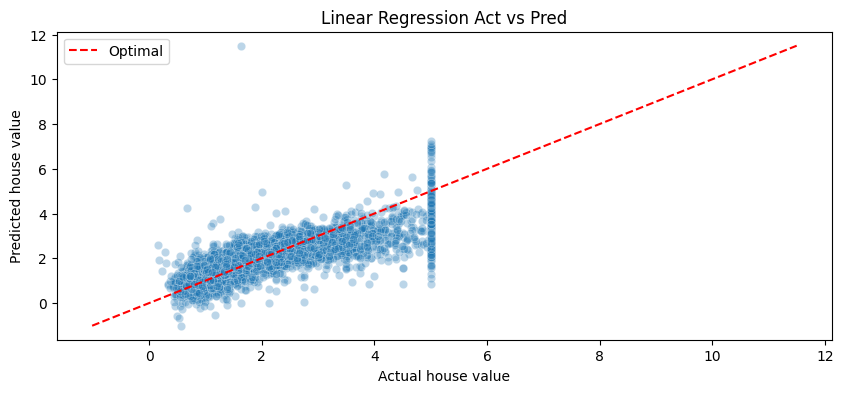

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,4))
sns.scatterplot(x=y_test, y=pred, alpha = .3)

lims=[ min(y_test.min(),pred.min()), max(y_test.max(), pred.max()) ]
plt.plot(lims, lims, '--', color='red', label='Optimal')

plt.xlabel("Actual house value")
plt.ylabel("Predicted house value")
plt.title("Linear Regression Act vs Pred")
plt.legend()
plt.show()

In [64]:
## Part 2: Logistic Regression

from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)
df = iris.frame
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [56]:
print(data.feature_names)
print(iris.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [61]:
data.target_names
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [63]:
data.frame
iris.frame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [95]:
from sklearn.model_selection import train_test_split
X = df[iris.feature_names]
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#Number of rows and columns 
print("Training sample:", X_train.shape)
print("Testing sample:", X_test.shape)

Training sample: (120, 4)
Testing sample: (30, 4)


In [96]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter = 200)
clf.fit(X_train, y_train)

print("Model training complete after",clf.n_iter_,"iterations") 

Model training complete after [100] iterations


In [97]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average = 'macro'))
print("Recall:", recall_score(y_test, y_pred, average = 'macro')) 

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


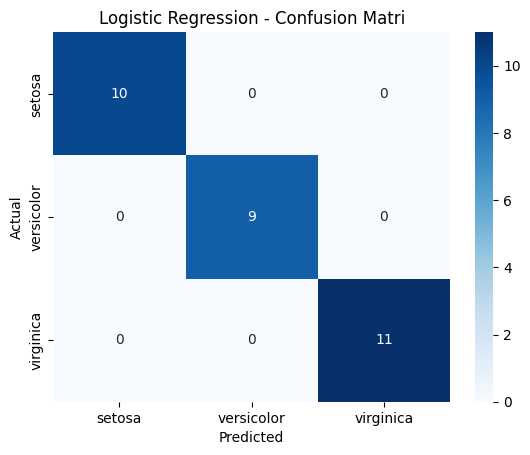

In [98]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = iris.target_names, yticklabels = iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression - Confusion Matri")
plt.show()

In [1]:
# Summary

### Linear Regression (Project 1 – California Housing)
- Goal: Predict median house values from numeric features.  
- Metrics: MSE = …  R² = …  
- Insights: Higher income and newer houses correlate strongly with higher values.  

### Logistic Regression (Project 2 – Iris Classification)
- Goal: Predict flower species from petal and sepal dimensions.  
- Accuracy: 100 %  
- Interpretation: Classes are linearly separable; logistic regression generalizes perfectly.  

### Key Takeaways
- Regression → continuous predictions (error-based metrics).  
- Classification → discrete predictions (accuracy-based metrics).  
- Evaluating the right metric type is critical for trustworthy results.

SyntaxError: invalid syntax (2777193893.py, line 4)

In [4]:
## 🌳 Decision Tree Classifier (Iris Dataset)
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

iris = load_iris(as_frame = True)
X, y = iris.data, iris.target

In [5]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [57]:
clf = DecisionTreeClassifier(max_depth = 5, random_state = 42)
clf.fit(X, y)

y_pred = clf.predict(X)
print("Trainint accuracy:", accuracy_score(y_pred, y))

Trainint accuracy: 1.0


In [58]:
clf.tree_.__getstate__()

{'max_depth': 5,
 'node_count': 17,
 'nodes': array([( 1,  2,  2,  2.44999999, 0.66666667, 150, 150., 0),
        (-1, -1, -2, -2.        , 0.        ,  50,  50., 0),
        ( 3, 12,  3,  1.75      , 0.5       , 100, 100., 1),
        ( 4,  7,  2,  4.95000005, 0.16803841,  54,  54., 1),
        ( 5,  6,  3,  1.65000004, 0.04079861,  48,  48., 1),
        (-1, -1, -2, -2.        , 0.        ,  47,  47., 0),
        (-1, -1, -2, -2.        , 0.        ,   1,   1., 0),
        ( 8,  9,  3,  1.55000001, 0.44444444,   6,   6., 0),
        (-1, -1, -2, -2.        , 0.        ,   3,   3., 0),
        (10, 11,  2,  5.45000005, 0.44444444,   3,   3., 1),
        (-1, -1, -2, -2.        , 0.        ,   2,   2., 0),
        (-1, -1, -2, -2.        , 0.        ,   1,   1., 0),
        (13, 16,  2,  4.85000014, 0.04253308,  46,  46., 0),
        (14, 15,  0,  5.95000005, 0.44444444,   3,   3., 0),
        (-1, -1, -2, -2.        , 0.        ,   1,   1., 0),
        (-1, -1, -2, -2.        , 0.    

In [59]:
clf.tree_.feature

array([ 2, -2,  3,  2,  3, -2, -2,  3, -2,  2, -2, -2,  2,  0, -2, -2, -2],
      dtype=int64)

In [60]:
print(clf.tree_.children_left)
print(clf.tree_.children_right)


[ 1 -1  3  4  5 -1 -1  8 -1 10 -1 -1 13 14 -1 -1 -1]
[ 2 -1 12  7  6 -1 -1  9 -1 11 -1 -1 16 15 -1 -1 -1]


In [61]:
import pandas as pd

# Build a readable mapping of parent-child relationships
tree_map = pd.DataFrame({
    "Node": range(clf.tree_.node_count),
    "Feature_Index": clf.tree_.feature,
    "Feature_Name": [iris.feature_names[i] if i != -2 else "Leaf" for i in clf.tree_.feature],
    "Threshold": clf.tree_.threshold,
    "Left_Child Node": clf.tree_.children_left,
    "Right_Child Node": clf.tree_.children_right,
    "Samples": clf.tree_.n_node_samples,
    "Gini": clf.tree_.impurity
})

# Display the first few rows
tree_map

,Node,Feature_Index,Feature_Name,Threshold,Left_Child Node,Right_Child Node,Samples,Gini
0,0,2,petal length (cm),2.45,1,2,150,0.666667
1,1,-2,Leaf,-2.00,-1,-1,50,0.000000
2,2,3,petal width (cm),1.75,3,12,100,0.500000
3,3,2,petal length (cm),4.95,4,7,54,0.168038
4,4,3,petal width (cm),1.65,5,6,48,0.040799
5,5,-2,Leaf,-2.00,-1,-1,47,0.000000
6,6,-2,Leaf,-2.00,-1,-1,1,0.000000
7,7,3,petal width (cm),1.55,8,9,6,0.444444
8,8,-2,Leaf,-2.00,-1,-1,3,0.000000
9,9,2,petal length (cm),5.45,10,11,3,0.444444


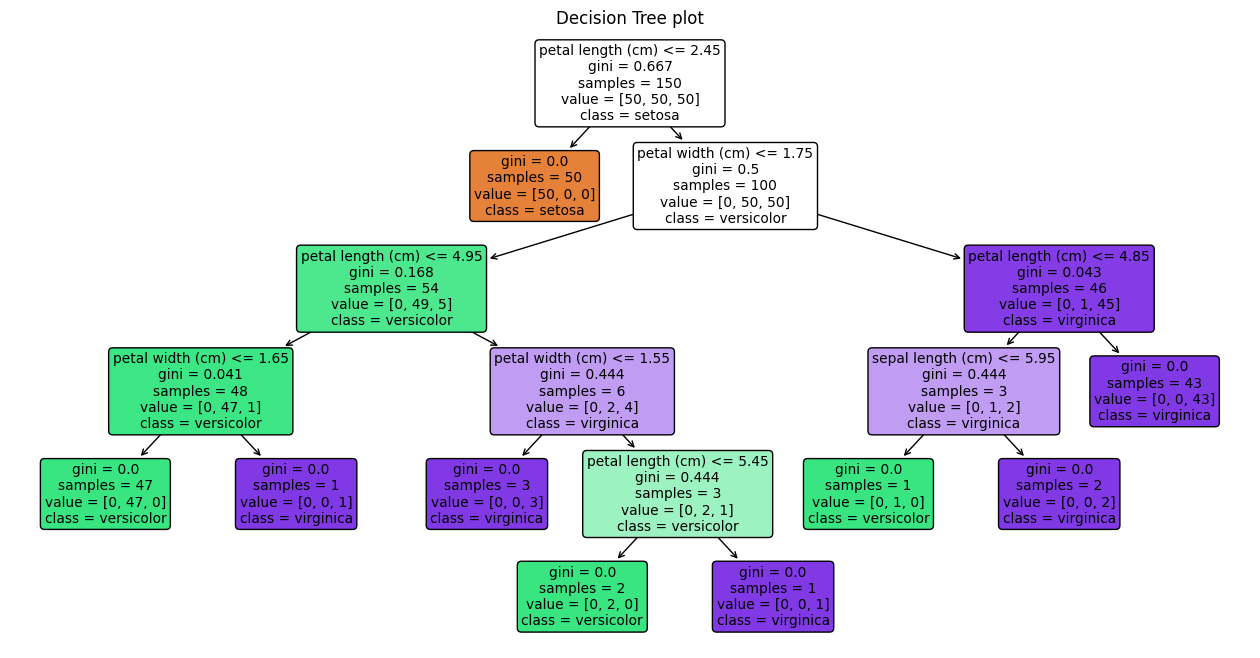

In [62]:
plt.figure(figsize=(16,8))
plot_tree(
    clf
    , filled = True
    , rounded = True
    , feature_names = iris.feature_names
    , class_names = iris.target_names
)
plt.title("Decision Tree plot")
plt.show()

In [74]:
## Random forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)


RandomForestClassifier(random_state=42)

In [73]:
y_pred_rf = rf.predict(X)
print("Rf Accuracy:", accuracy_score(y_pred_rf,y))

Rf Accuracy: 0.9933333333333333


In [93]:
#print(rf.estimators_)
#for estimator in rf.estimators_:
#    print (type(estimator))
max_depth= [estimator.tree_.max_depth for estimator in rf.estimators_]
print("Num of trees:", len(max_depth), ", Avg depth:", sum(max_depth)/len(max_depth), ", Max:", max(max_depth), ", Min Depth:", min(max_depth))


print("No features per tree:", rf.n_features_in_)


Num of trees: 100 , Avg depth: 5.31 , Max: 8 , Min Depth: 2
No features per tree: 4


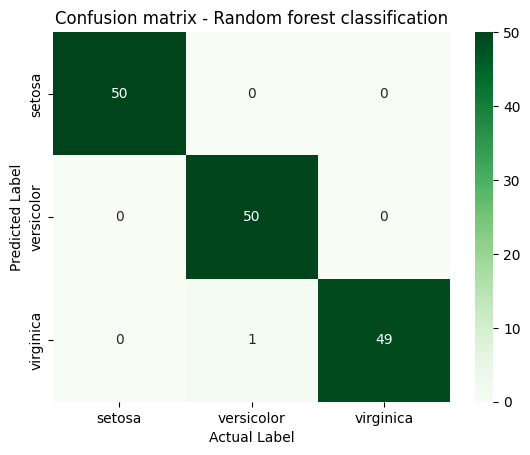

In [99]:
cm = confusion_matrix(y, y_pred_rf)

sns.heatmap(
    cm
    , annot = True
    , fmt = 'd'
    , cmap = 'Greens'
    , xticklabels = iris.target_names
    , yticklabels = iris.target_names
)

plt.xlabel("Actual Label")
plt.ylabel("Predicted Label")
plt.title("Confusion matrix - Random forest classification")
plt.show()

In [101]:
import pandas as pd

fi = pd.DataFrame({
    "Feature": iris.feature_names
    ,"Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

display(fi)

,Feature,Importance
2,petal length (cm),0.436130
3,petal width (cm),0.436065
0,sepal length (cm),0.106128
1,sepal width (cm),0.021678


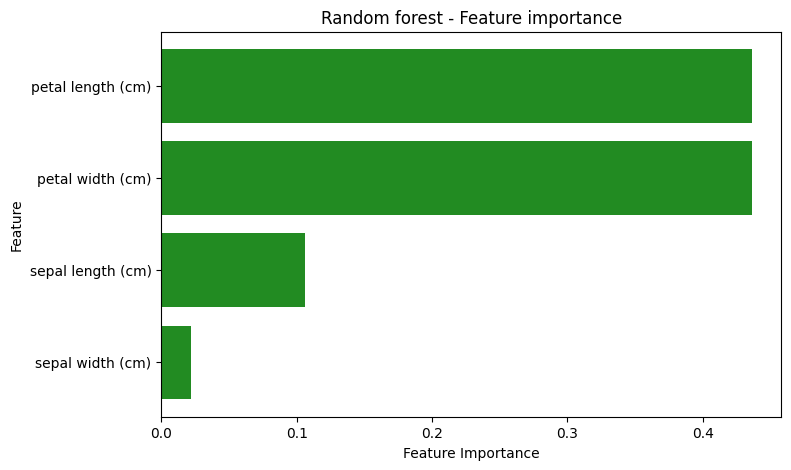

In [112]:
plt.figure(figsize=(8,5))
plt.barh(fi["Feature"],fi["Importance"],  color = "forestgreen")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Random forest - Feature importance")
#plt.show()

plt.gca().invert_yaxis()
plt.show() 

## Cross-Validation & ROC Curve – Breast Cancer Dataset

## Cross-Validation & ROC Curve – Breast Cancer Dataset

In [4]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

data = load_breast_cancer(as_frame = True)
X = data.data
y = data.target

X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
print(X.shape)
print(y.shape)
print(X.columns.tolist())

(569, 30)
(569,)
['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

print("Training sample", X_train.shape)
print("Test sample", X_test.shape)

models = {
      "Logistic_Regression": LogisticRegression(max_iter=4000)
    , "Decision Tree": DecisionTreeClassifier(random_state = 42)
    , "Random Forest": RandomForestClassifier(n_estimators = 100, random_state = 42)
    }

for name, model in models.items():
    print(name, model)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print("Accuracy :", score)


Training sample (455, 30)
Test sample (114, 30)
Logistic_Regression LogisticRegression(max_iter=4000)
Accuracy : 0.9649122807017544
Decision Tree DecisionTreeClassifier(random_state=42)
Accuracy : 0.9122807017543859
Random Forest RandomForestClassifier(random_state=42)
Accuracy : 0.956140350877193


In [27]:
# Step 3: Cross-Validation for model stability

from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np

cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

cv_results = {}

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring = 'accuracy')
    cv_results[name] = scores
    print(name, "Mean:", scores.mean(), "Std Dev:", scores.std())

Logistic_Regression Mean: 0.945054945054945 Std Dev: 0.015540808377726312
Decision Tree Mean: 0.9164835164835164 Std Dev: 0.017855029460738393
Random Forest Mean: 0.9626373626373628 Std Dev: 0.01785502946073838


Logistic_Regression (AUC=0.995)
Decision Tree (AUC=0.916)
Random Forest (AUC=0.994)


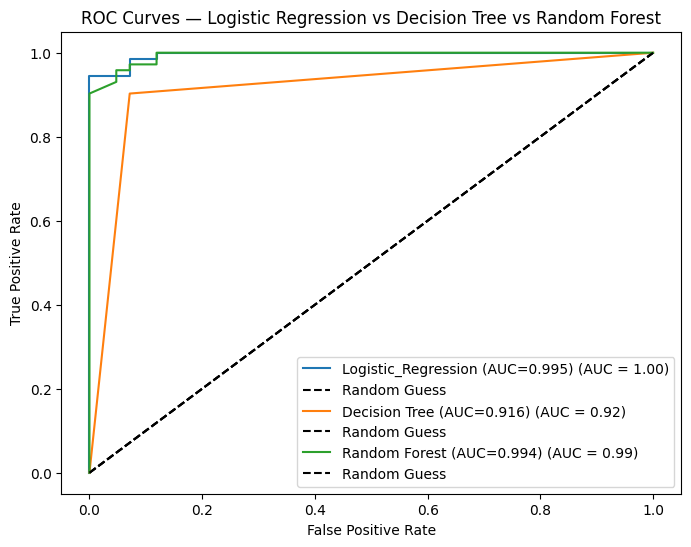

In [34]:
# Step 4: ROC Curve and AUC comparison

from sklearn.metrics import RocCurveDisplay, roc_auc_score
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

for name, model in models.items():
    model.fit(X_train, y_train)
    y_proba = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_proba)
    label = f"{name} (AUC={auc:.3f})"
    print (label)
    RocCurveDisplay.from_estimator(model, X_test, y_test, ax = plt.gca(), name = label)

    plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.title("ROC Curves — Logistic Regression vs Decision Tree vs Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()
